In [150]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Transformations

In [151]:
data = pd.read_csv(os.getcwd() + '/mixed_delays.csv')
data.loc[:,'datetime'] = pd.to_datetime(data['datetime'])
data.head()

,avg_dep,airport,num_obs,datetime,avg_weather
0,7.500000,ABE,2.0,2018-01-01,Precipitation UNK
1,17.500000,ABE,2.0,2018-01-02,Clear
2,6.333333,ABE,3.0,2018-01-03,Cold Severe
3,109.500000,ABE,2.0,2018-01-04,Snow Light
4,60.500000,ABE,2.0,2018-01-05,Clear


In [152]:
# categorical variables
data['avg_weather'].unique()

array(['Precipitation UNK', 'Clear', 'Cold Severe', 'Snow Light',
       'Fog Severe', 'Rain Light', 'Fog Moderate', 'Snow Moderate',
       'Storm Severe', 'Rain Moderate', 'Snow Heavy', 'Rain Heavy',
       'Hail Other'], dtype=object)

In [153]:
data['trans_dep'] = data.groupby(['airport'])['avg_dep'].transform(lambda x: np.log(x-x.min()+1))
data.loc[:,'trans_dep'] = data.groupby(['airport'])['trans_dep'].transform(lambda x: x-x.mean())

In [154]:
top_airports = data.groupby('airport').sum()['num_obs'].sort_values(ascending = False)
top_airports.head()

airport
ATL    588985.0
ORD    486146.0
DFW    414361.0
DEN    351697.0
LAX    329193.0
Name: num_obs, dtype: float64

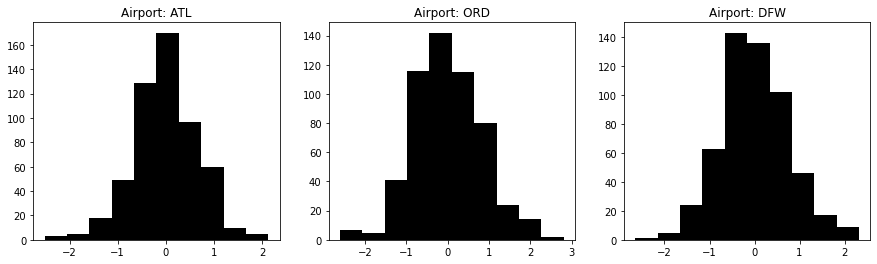

In [155]:
# continuous variables

fig, ax = plt.subplots(1,3, figsize = (15,4))
for i in range(3):
    ap = top_airports.index[i]
    values = data.query('airport == @ap')['trans_dep']
    ax[i].hist(values, color = 'k')
    ax[i].set_title(f'Airport: {ap}')

# Subsetting and Modelling 

In [156]:
top_10 = top_airports.index[:10]
df = data.query('airport in @top_10').sort_values(by = ['datetime'])
print(top_10)
df.head()

Index(['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'CLT', 'PHX', 'IAH', 'SFO', 'LAS'], dtype='object', name='airport')


,avg_dep,airport,num_obs,datetime,avg_weather,trans_dep
3794,25.790689,ATL,817.0,2018-01-01,Snow Light,0.839016
55462,34.098664,ORD,800.0,2018-01-01,Clear,1.003409
40810,18.209959,LAX,567.0,2018-01-01,Fog Moderate,0.691267
40264,9.021925,LAS,400.0,2018-01-01,Clear,0.103570
33729,12.666609,IAH,437.0,2018-01-01,Clear,0.360495


In [195]:
cols = ['airport', 'trans_dep', 'avg_weather']
train = pd.get_dummies(df[cols], columns = ['avg_weather'])

In [197]:
train.head()

,airport,trans_dep,avg_weather_Clear,avg_weather_Cold Severe,avg_weather_Fog Moderate,avg_weather_Fog Severe,avg_weather_Hail Other,avg_weather_Precipitation UNK,avg_weather_Rain Heavy,avg_weather_Rain Light,avg_weather_Rain Moderate,avg_weather_Snow Heavy,avg_weather_Snow Light,avg_weather_Snow Moderate,avg_weather_Storm Severe
3794,ATL,0.839016,0,0,0,0,0,0,0,0,0,0,1,0,0
55462,ORD,1.003409,1,0,0,0,0,0,0,0,0,0,0,0,0
40810,LAX,0.691267,0,0,1,0,0,0,0,0,0,0,0,0,0
40264,LAS,0.103570,1,0,0,0,0,0,0,0,0,0,0,0,0
33729,IAH,0.360495,1,0,0,0,0,0,0,0,0,0,0,0,0


### To Do

Now I need to construct functions to set up the pairwise interactions contained in the nodewise conditional density functions. Once that is done, all that is left is to either write my own numerical optimization scheme (Proximal-Newton) or naively use cvxpy and see how quickly that converges.